In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def polynomial_fit(x, y, degree):
    # Vandermonde matrix
    X = np.vander(x, degree + 1)
    #least squares solution for the coefficients 'a'
    X_T_X = X.T @ X
    X_T_y = X.T @ y
    coeff = np.linalg.solve(X_T_X, X_T_y)  # Solve for coefficients
    return coeff

def evaluate_poly_horner(x, coeffs):
    result = 0
    for coeff in coeffs:
        result = result * x + coeff
    return result

In [6]:
path = 'C://Users//akpat//Desktop//Agnikul//90 days plan//7-4-7 Databook//CG MI Model V3.2//train data//'
coeff_path = 'C://Users//akpat//Desktop//Agnikul//90 days plan//7-4-7 Databook//CG MI Model V3.2//MI Coefficients//MYB_ATF_'
df = pd.read_csv(path+'MYB_ATF.csv')
print(df.shape)
df.head(5)

(18, 10)


,Mass (kg),r_cg_x (mm),r_cg_y (mm),r_cg_z (mm),Ixx (kg mm2),Iyx (kg mm2),Iyy (kg mm2),Izx (kg mm2),Izy (kg mm2),Izz (kg mm2)
0,10.358,-17539.719,-1430,0,2.162236e+07,-2.598082e+08,3.190000e+09,0.0,0.0,3.210000e+09
1,21.361,-17520.148,-1430,0,4.498378e+07,-5.351733e+08,6.560000e+09,0.0,0.0,6.600000e+09
2,29.730,-17508.612,-1430,0,6.293316e+07,-7.443593e+08,9.110000e+09,0.0,0.0,9.180000e+09
3,38.940,-17497.681,-1430,0,8.283050e+07,-9.743503e+08,1.190000e+10,0.0,0.0,1.200000e+10
4,49.264,-17486.866,-1430,0,1.052878e+08,-1.231911e+09,1.510000e+10,0.0,0.0,1.520000e+10


In [8]:
coeffs_df = pd.DataFrame() ## To store Coefficient
degree = 11

## B1 ATF

### Ixx

[-2.81914698e-27  5.36245547e-23 -4.37696609e-19  2.00555406e-15
 -5.66966896e-12  1.02488772e-08 -1.19134628e-05  8.78115577e-03
 -3.98509362e+00  1.05978539e+03  2.10443326e+06 -4.31263952e+05]


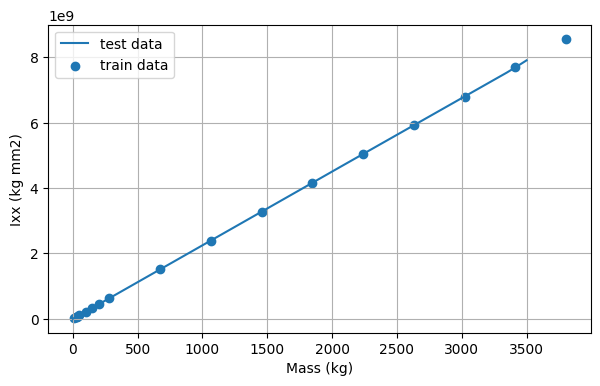

In [12]:
##Generate Coefficients
y_param = 'Ixx (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,3500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Iyx

[ 2.06121920e-26 -3.73806400e-22  2.88190540e-18 -1.23236839e-14
  3.19849058e-11 -5.18074306e-08  5.18246960e-05 -3.04312992e-02
  9.25170193e+00 -2.91210590e+02 -2.50070681e+07 -7.80792831e+05]


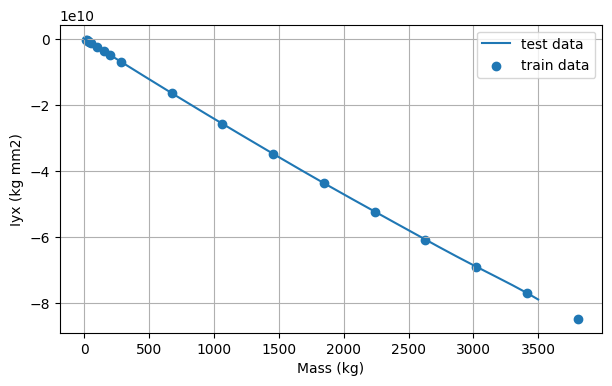

In [16]:
##Generate Coefficients
y_param = 'Iyx (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,3500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Iyy

[-2.71774788e-25  5.09678352e-21 -4.07783018e-17  1.81663947e-13
 -4.93339262e-10  8.40668689e-07 -8.92288978e-04  5.66595635e-01
 -1.97383811e+02  1.47048450e+04  3.03725688e+08  6.53157670e+07]


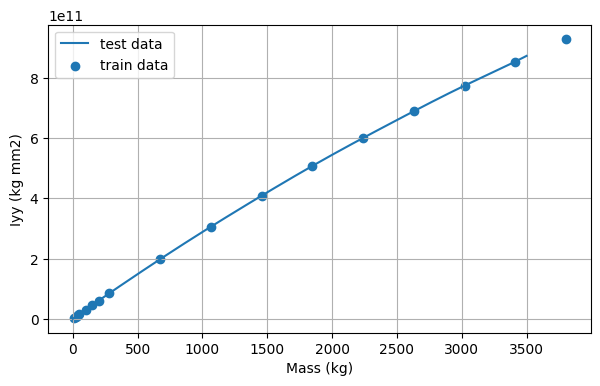

In [19]:
##Generate Coefficients
y_param = 'Iyy (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,3500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Izx

[ 3.43736232e-38 -3.28853632e-34 -5.21652596e-31  2.04339629e-26
 -1.21641135e-22  3.67159802e-19 -6.46507626e-16  6.77168341e-13
 -4.03818928e-10  1.21722813e-07 -1.22110578e-05  2.38376866e-04]


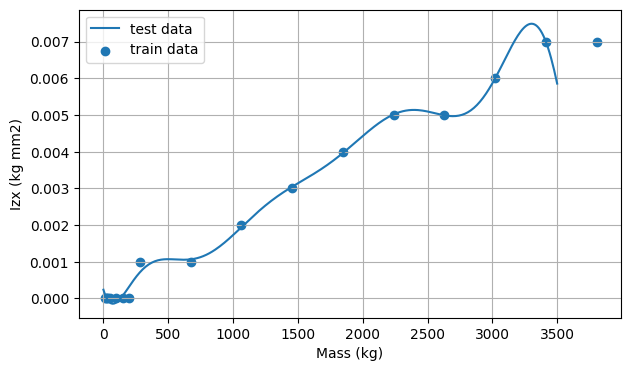

In [22]:
##Generate Coefficients
y_param = 'Izx (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,3500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Izy

[ 3.64181642e-38 -6.30250638e-34  4.62996331e-30 -1.88664080e-26
  4.67591015e-23 -7.26790480e-20  7.04178118e-17 -4.08485213e-14
  1.30115980e-11 -1.93312973e-09  1.03886695e-07 -1.32108863e-06]


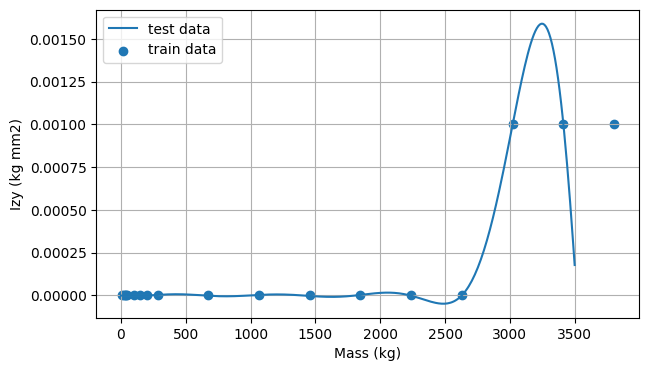

In [25]:
##Generate Coefficients
y_param = 'Izy (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,3500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Izz

[ 7.71590596e-26 -1.38052428e-21  1.03599245e-17 -4.21823726e-14
  1.00419814e-10 -1.39426543e-07  1.04152266e-04 -3.18834721e-02
  3.71929837e-01 -1.85262812e+04  3.08213912e+08  3.16532597e+07]


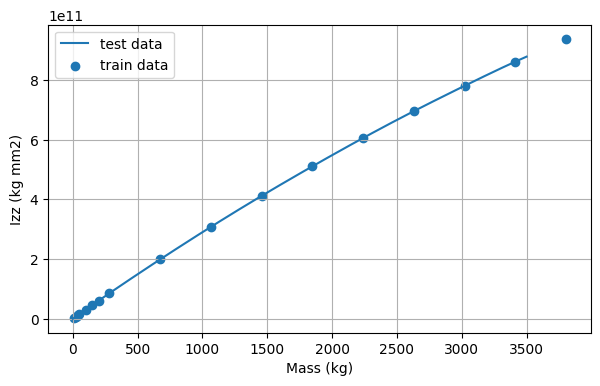

In [28]:
##Generate Coefficients
y_param = 'Izz (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,3500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

## Finding best degree

In [38]:
y_param = 'Ixx (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]

coeffs_list = []
degrees = np.arange(2, 18, 1)
for degree in degrees:
    coeffs = polynomial_fit(x_train, y_train, degree)
    coeffs_list.append(coeffs)
len(coeffs_list)

16

Text(0, 0.5, 'Error')

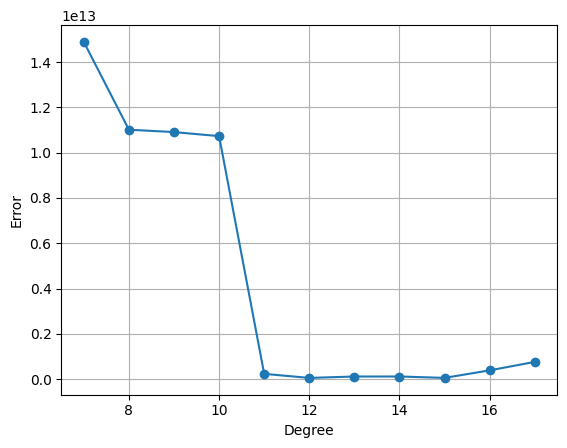

In [40]:
x_val = np.array(df['Mass (kg)'])
y_val = np.array(df[y_param])
df_test = pd.DataFrame()
df_test['mass'] = x_val
error = []
for i in range(len(coeffs_list)):
    coeff = coeffs_list[i]
    y_est = evaluate_poly_horner(x_val, coeff)
    error.append(np.sum((y_val-y_est)**2))
    df_test[f'deg_{degrees[i]}'] = y_est

plt.plot(degrees[5:], error[5:], marker='o')
plt.grid()
plt.xlabel('Degree')
plt.ylabel('Error')